#  WHATS A Neural Network?
 neural network is an artificial system made of interconnected nodes (neurons) that process information, modeled after the structure of the human brain. It is employed in machine learning jobs where patterns are extracted from data.

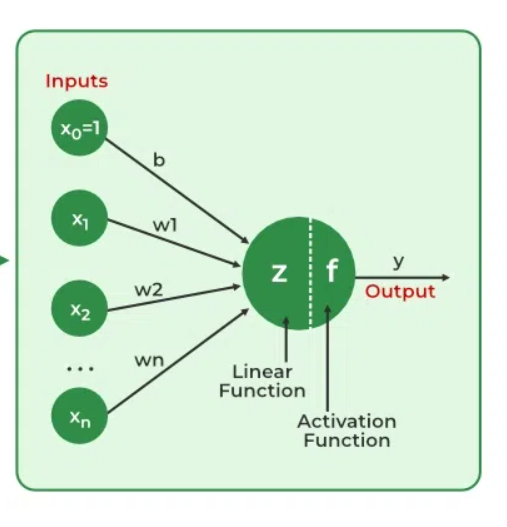

**But actually How does it work?**

Layers of connected neurons process data in neural networks. The network processes input data, modifies weights during training, and produces an output depending on patterns that it has discovered.

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#Defining the sigmoid function as an activation function
def sigmoid(x, deriv=False):
    if deriv:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [36]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
               [1, 0, 1],
                [1, 1, 1]])
Y = np.array([[0], [0], [1], [1]])

In [37]:
print(X)
print(Y)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[0]
 [0]
 [1]
 [1]]


In [38]:
# Initialize weights
np.random.seed(42)  # For reproducibility
W = 2 * np.random.random((3, 1)) - 1

In [39]:
#Define the number of iterations for training
iterations = 10000
#Train the perceptron
for i in range(iterations):
    # Feed forward
    Out = sigmoid(np.dot(X, W))
    err = Y - Out
    W += np.dot(X.T, err * sigmoid(Out, deriv=True))
W

array([[ 9.67256303],
       [-0.20811174],
       [-4.62926144]])

In [40]:
print(Out)

[[0.00966808]
 [0.00786589]
 [0.99358863]
 [0.99211705]]


In [41]:
predictions = sigmoid(np.dot(X, W))
predicted_classes = np.round(predictions)

# Predict the class for [1, 0, 0]
new_observation = np.array([[1, 0, 0]])
prediction_new_observation = sigmoid(np.dot(new_observation, W))
predicted_class_new_observation = np.round(prediction_new_observation)
print(Out)
# Display the results
print("Predicted classes for the given data:")
print(predicted_classes)

print("Predicted class for the new observation [1, 0, 0]:")
print(predicted_class_new_observation)

[[0.00966808]
 [0.00786589]
 [0.99358863]
 [0.99211705]]
Predicted classes for the given data:
[[0.]
 [0.]
 [1.]
 [1.]]
Predicted class for the new observation [1, 0, 0]:
[[1.]]


If we can get into a basic **Perceptron ** class, which is very important asset in neural networks

In [42]:
def sigmoid(x: float) -> float:
  return 1 / (1+ np.exp(-x))

def sigmoid_derivative(x: float) -> float:
  return x * (1-x)

class Perceptron:
    def __init__(self, input_size: int):
      """input size refers to the number of features in the input data
      Initialize the perceptron with random weights and bias
      store the error values during the training
      """
      self.weights = np.random.randn(input_size)
      self.bias = np.random.randn()
      self.errors: list[float] = []

    def feedforward(self, inputs: np.ndarray) -> float:
      """
      inputs(np.ndarray): Input data as numpy array
      output : float of the perceptron after we apply the activation function aka sigmoid function
      """
      if len(inputs) != len(self.weights):
          raise ValueError("Input dimension must match the weight dimension.")
      weighted_sum = np.dot(inputs, self.weights) + self.bias
      output = sigmoid(weighted_sum)
      return output

    def train(self, inputs : np.ndarray, targets: np.ndarray, initial_learning_rate: float = 0.1, epochs : int = 100) -> None:
      """
      training the perceptron over the data set

      inputs : training data
      targets : target values
      epochs : iterations over the entire dataset
      learning_rate : for weights updates
      """
      for epoch in range(epochs):
            total_error = 0
            current_learning_rate = initial_learning_rate * (decay_rate ** epoch)
            for i in range(len(inputs)):
                # Forward pass
                output = self.feedforward(inputs[i])

                # Calculate error
                error = targets[i] - output
                self.errors.append(error)
                total_error += abs(error)

                # Gradient descent weight and bias update
                adjustment = current_learning_rate * error * sigmoid_derivative(output)
                self.weights += adjustment * inputs[i]
                self.bias += adjustment
                total_error = np.sum(total_error)
            if epoch % 10 == 0:
                print(f"Epoch {epoch + 1}/{epochs} - Total Error: {total_error:.5f}  - Learning Rate: {current_learning_rate:.5f}")

      def predict(self, inputs: np.ndarray) -> int:
        """
        Predict the class label for given inputs.
        - inputs (np.ndarray): Input data for prediction.

        Returns:
        - int: Predicted class label (0 or 1).
        """
        return 1 if self.feedforward(inputs) > 0.5 else 0



#initiation of a basic perceptron class
perceptron : Perceptron = Perceptron(input_size=3)
#training with learning rate decay
initial_learning_rate = 0.7
decay_rate = 0.99
epochs= 4000
perceptron.train(X,Y,initial_learning_rate=initial_learning_rate,epochs=epochs)


Epoch 1/4000 - Total Error: 2.55408  - Learning Rate: 0.70000
Epoch 11/4000 - Total Error: 1.95402  - Learning Rate: 0.63307
Epoch 21/4000 - Total Error: 1.40531  - Learning Rate: 0.57253
Epoch 31/4000 - Total Error: 1.10871  - Learning Rate: 0.51779
Epoch 41/4000 - Total Error: 0.93848  - Learning Rate: 0.46828
Epoch 51/4000 - Total Error: 0.83012  - Learning Rate: 0.42350
Epoch 61/4000 - Total Error: 0.75555  - Learning Rate: 0.38301
Epoch 71/4000 - Total Error: 0.70129  - Learning Rate: 0.34639
Epoch 81/4000 - Total Error: 0.66016  - Learning Rate: 0.31327
Epoch 91/4000 - Total Error: 0.62802  - Learning Rate: 0.28331
Epoch 101/4000 - Total Error: 0.60230  - Learning Rate: 0.25622
Epoch 111/4000 - Total Error: 0.58133  - Learning Rate: 0.23172
Epoch 121/4000 - Total Error: 0.56397  - Learning Rate: 0.20957
Epoch 131/4000 - Total Error: 0.54943  - Learning Rate: 0.18953
Epoch 141/4000 - Total Error: 0.53712  - Learning Rate: 0.17141
Epoch 151/4000 - Total Error: 0.52661  - Learning R

- the total error decreses as the number of epochs increases , after 100 epochs the learning rate is 0.2562 , it decayed exponentially .
- we choose ***a higher learning rate allows the model to learn quickly*** as the learning rate becomes smaller -> the error reduction becomes very slower

- its a good sign the error went from **1.66450** to **0.4198** by epoch **1001**

**Learning Rate decay effect** :
 - As the learning rate decays, updates become smaller leading to finer adjustments to weights and bias,
 - the slow rate of error reduction at the most recent epochs may indicates that the model is reaching a point of minimal error where the process of decreasing continously refers that the perceptron is learning fittig the data overtime.
 -when the learning rate is too small, the model might not learn effectively -> which can lead to a very slow updates.

Considering using an inverse time decay approach for a more contolled reduction:
where the formula for **Inverse time decay is** :
Learning_rate = initial_learning_rate /(1+decay_rate * epoch )


In [60]:
class Perceptron:
    def __init__(self, input_size: int):
      """input size refers to the number of features in the input data
      Initialize the perceptron with random weights and bias
      store the error values during the training
      """
      self.weights = np.random.randn(input_size)
      self.bias = np.random.randn()
      self.errors: list[float] = []

    def feedforward(self, inputs: np.ndarray) -> float:
      """
      inputs(np.ndarray): Input data as numpy array
      output : float of the perceptron after we apply the activation function aka sigmoid function
      """
      if len(inputs) != len(self.weights):
          raise ValueError("Input dimension must match the weight dimension.")
      weighted_sum = np.dot(inputs, self.weights) + self.bias
      output = sigmoid(weighted_sum)
      return output

    def train(self, inputs : np.ndarray, targets: np.ndarray, initial_learning_rate: float = 0.1, epochs : int = 100) -> None:
      """
      training the perceptron over the data set

      inputs : training data
      targets : target values
      epochs : iterations over the entire dataset
      learning_rate : for weights updates
      """
      for epoch in range(epochs):
            total_error = 0
            correct_predictions = 0
            current_learning_rate = initial_learning_rate / (1+ decay_rate * epoch)
            for i in range(len(inputs)):
                # Forward pass
                output = self.feedforward(inputs[i])

                # Calculate error
                error = targets[i] - output
                self.errors.append(error)
                total_error += abs(error)

                # Gradient descent weight and bias update
                adjustment = current_learning_rate * error * sigmoid_derivative(output)
                self.weights += adjustment * inputs[i]
                self.bias += adjustment

                total_error = np.sum(total_error)
            if epoch % 10 == 0:
                print(f"Epoch {epoch + 1}/{epochs} - Total Error: {total_error:.5f}  - Learning Rate: {current_learning_rate:.5f}")

    def predict(self, inputs: np.ndarray) -> int:
        """
        Predict the class label for given inputs.
        - inputs (np.ndarray): Input data for prediction.

        Returns:
        - int: Predicted class label (0 or 1).
        """
        return 1 if self.feedforward(inputs) > 0.5 else 0



#initiation of a basic perceptron class
perceptron : Perceptron = Perceptron(input_size=3)
#training with learning rate decay
initial_learning_rate = 0.7
decay_rate = 0.01
epochs= 4000
perceptron.train(X,Y,initial_learning_rate=initial_learning_rate,epochs=epochs)


Epoch 1/4000 - Total Error: 1.88115  - Learning Rate: 0.70000
Epoch 11/4000 - Total Error: 1.27807  - Learning Rate: 0.63636
Epoch 21/4000 - Total Error: 1.00901  - Learning Rate: 0.58333
Epoch 31/4000 - Total Error: 0.85433  - Learning Rate: 0.53846
Epoch 41/4000 - Total Error: 0.75467  - Learning Rate: 0.50000
Epoch 51/4000 - Total Error: 0.68492  - Learning Rate: 0.46667
Epoch 61/4000 - Total Error: 0.63315  - Learning Rate: 0.43750
Epoch 71/4000 - Total Error: 0.59302  - Learning Rate: 0.41176
Epoch 81/4000 - Total Error: 0.56089  - Learning Rate: 0.38889
Epoch 91/4000 - Total Error: 0.53450  - Learning Rate: 0.36842
Epoch 101/4000 - Total Error: 0.51237  - Learning Rate: 0.35000
Epoch 111/4000 - Total Error: 0.49351  - Learning Rate: 0.33333
Epoch 121/4000 - Total Error: 0.47720  - Learning Rate: 0.31818
Epoch 131/4000 - Total Error: 0.46294  - Learning Rate: 0.30435
Epoch 141/4000 - Total Error: 0.45033  - Learning Rate: 0.29167
Epoch 151/4000 - Total Error: 0.43910  - Learning R

- the model is improving while fitting the data in covergence
-the Total error is decreasing with each epoch -> the model is learning and adjusting the weights effectively to minimize the error .
- the learning rate also is decreasing overtime proving the gradual reduction in it shown in the output.
- the reduction allows a convergence making finer adjustements as it is getting closer to the optimal solution.

**About the convergence** while we r seeing the consistency in decreasing the total error without non stop unlike the first approach suggests that the model is converging well , while the learning rate is being reduced smoothly helping to find the best params.

Overall, the current results are much better than the previous results, and the inverse time decay is effectively managing learning rate and improving the training process.

In [64]:
# Test the trained perceptron
test_input = np.array([1, 1, 1])
# Get the raw prediction (before thresholding)
prediction: float = perceptron.feedforward(test_input)
class_p = perceptron.predict(test_input)
print(
    f"Prediction for {test_input}: \nPrediction: {round(prediction[0], 4)} \nClass: {class_p}"
)

Prediction for [1 1 1]: 
Prediction: 0.949 
Class: 1


In [74]:
#Saving the model parameters
import pickle
#model parameters means = (weights and bias)
model_params = {"weights": perceptron.weights, "bias": perceptron.bias}
with open("perceptron_model.pkl","wb") as f:
     pickle.dump(model_params, f)

In [75]:
#reloading the params of the model after saving it
#in case we need it , we dont have to retrain it
with open("perceptron_model.pkl", "rb") as f:
    loaded_params = pickle.load(f)

perceptron.weights = loaded_params["weights"]
perceptron.bias = loaded_params["bias"]

In [77]:
test_input = np.array([1, 0, 1])
prediction = perceptron.feedforward(test_input)
class_= perceptron.predict(test_input)
print(f"Prediction for {test_input}")
print(f" - Output value: {round(prediction[0], 4)}")
print(f" - Predicted class: {class_}")

Prediction for [1 0 1]
 - Output value: 0.9553
 - Predicted class: 1


In [78]:
test_input = np.array([0, 1, 1])
prediction = perceptron.feedforward(test_input)
class_= perceptron.predict(test_input)
print(f"Prediction for {test_input}")
print(f" - Output value: {round(prediction[0], 4)}")
print(f" - Predicted class: {class_}")

Prediction for [0 1 1]
 - Output value: 0.0503
 - Predicted class: 0
